# t-SNE Clustering
Visualization of t-SNE clustering for MNIST and CIFAR10 data

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import torchvision.transforms as transforms
# from torchvision import datasets
import torch
import sklearn
import wandb

desktop_path = '/Users/jocelynornelasmunoz/Desktop/Research/coded-aperture/jornelasmunoz/'
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
if desktop_path in sys.path[0]: sys.path.insert(0, desktop_path + 'lib/'); path = desktop_path
elif laptop_path in sys.path[0]: sys.path.insert(0, laptop_path + 'lib/'); path = laptop_path
print('Using path = ', path)

import MURA as mura
# from Reconstruct import CNN
#import confusion_matrix as cm
import wandb_functions as wf
from Classify import classification_cnn

Using path =  /Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/


In [4]:
# Update plotting parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times", #"Computer Modern Serif"
    "figure.figsize" : [15,10], #[15,7],#
})

In [4]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

# # Log into WandB
# wandb.login()

In [5]:
%%time
# Define hyperparameters
method = 'direct'
SNR = 'noiseless'

# Create dict to log into WandB
params = {
  "dataset": "CIFAR10_mura_gray",#f"CIFAR10_mura_{SNR}_reconstructed_{method}_method",
  "image_size": 23,
  "SNR": SNR,
  "method": method,
  "suffix": f"CIFAR10_encoded",#f"CIFAR10_{SNR}_reconstructed_{method}_method",#f"CIFAR10_{SNR}",#f"{SNR}_reconstructed_{method}_method",#f"{SNR}dB" #_reconstructed_{method}_method",
  "batch_size":100,
  "classes": ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),
  "kind": "tsne"
}

# # define hyperparameters
# params = {
#   "dataset": "encoded_MNIST",
#   "learning_rate": 1e-3,
#   # "batch_size": 100,
#   # "epochs": 20,
#   # "kernel_size":23,
#   "p": 23, # size of array (has to be prime)
#   "image_size": 23,
#   "kind": "tsne",
#   "suffix": "encoded",
#   # "lambda": 1e-7,
# }
# params['model'] = params['kind']+'_'+params['suffix']
# # Compute MURA encoder and decoder
# params['A'] = mura.create_binary_aperture_arr(params['p'])
# params['G'] = mura.create_decoding_arr(params['A'])
# # wandb.config = wf.wandb_config(params)

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 13.8 µs


# Load data

In [16]:
# Get encoded data 
mura_train_data, mura_eval_data, mura_test_data, loaders = classification_cnn.load_encoded_data(params)

Loading dataset from: ../data/CIFAR10/training_CIFAR10_mura_gray


In [17]:
# Initialize lists to save data
og_data = []
encoded_data = []
labels = []

for i in range(len(mura_train_data)):
    # Need to flatten images to save into dataframe later
    og_data.append(mura_train_data[i][1].numpy().ravel())
    encoded_data.append(mura_train_data[i][0].numpy().ravel())
    labels.append(mura_train_data[i][2])
    
# Make dataframe for original data
og_df = pd.DataFrame(og_data)
#og_df["label"] = labels
og_df.head()

# Make dataframe for encoded data
encoded_df = pd.DataFrame(encoded_data)
#encoded_df["label"] = labels
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
0,0.274311,0.384917,0.467609,0.457390,0.536886,0.297192,0.242432,0.386382,0.428442,0.261844,...,0.305568,0.462945,0.536759,0.525251,0.307207,0.135834,0.149672,0.140612,0.210642,0.258668
1,0.237660,0.318410,0.351840,0.239500,0.256680,0.197054,0.220343,0.163901,0.280395,0.281768,...,0.184452,0.271637,0.220178,0.303469,0.391468,0.381843,0.430518,0.344643,0.282558,0.205719
2,0.697450,0.692248,0.781249,0.746140,0.685686,0.687380,0.748055,0.704894,0.743979,0.777315,...,0.729593,0.738117,0.752118,0.710845,0.709870,0.618484,0.682818,0.681265,0.656211,0.631221
3,0.063019,0.039038,0.209044,0.306867,0.498973,0.417696,0.335294,0.311007,0.162838,0.208529,...,0.297874,0.394194,0.356954,0.351238,0.506740,0.454841,0.551535,0.496270,0.163390,0.070827
4,0.304476,0.289397,0.348247,0.383308,0.364519,0.422666,0.463256,0.324955,0.278050,0.240751,...,0.635817,0.704206,0.726643,0.668106,0.547039,0.543502,0.579927,0.532321,0.485621,0.448442


# Try T-SNE

In [18]:
from sklearn.manifold import TSNE

In [19]:
%%time
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(encoded_df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 45min 57s, sys: 4min 41s, total: 50min 38s
Wall time: 11min 8s


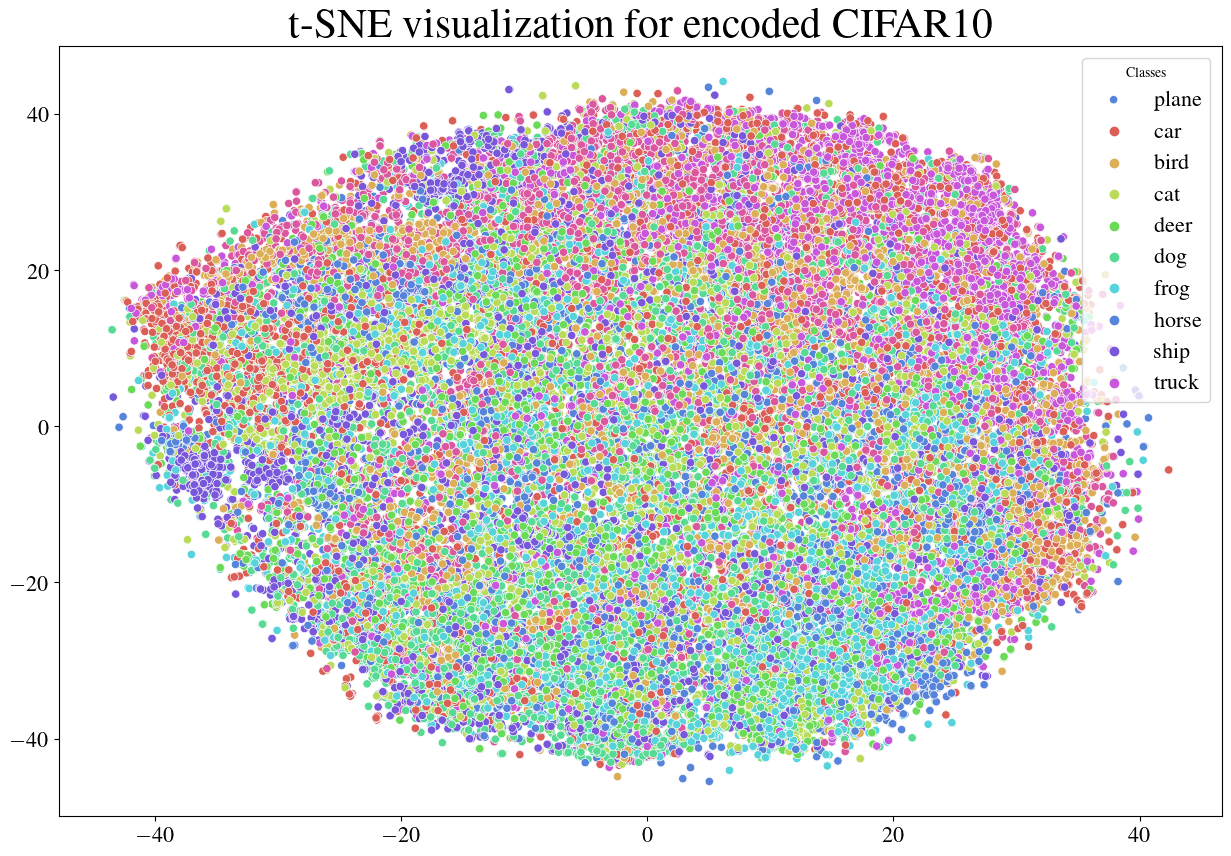

In [28]:
fontsize = 30
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels, palette = sns.hls_palette(10), legend = 'full')
plt.title("t-SNE visualization for encoded CIFAR10", fontsize=fontsize)
plt.xticks(fontsize=fontsize-14)
plt.yticks(fontsize=fontsize-14)
plt.legend(title='Classes', loc='best', labels=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize= fontsize-14)

# plt.savefig("../figs/tsne_CIFAR10_encoded.png")
plt.show()

In [21]:
%%time
tsne = TSNE(n_components = 2, random_state=0)
tsne_og_data = tsne.fit_transform(og_df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 1h 4min 48s, sys: 5min 34s, total: 1h 10min 23s
Wall time: 1h 18min 28s


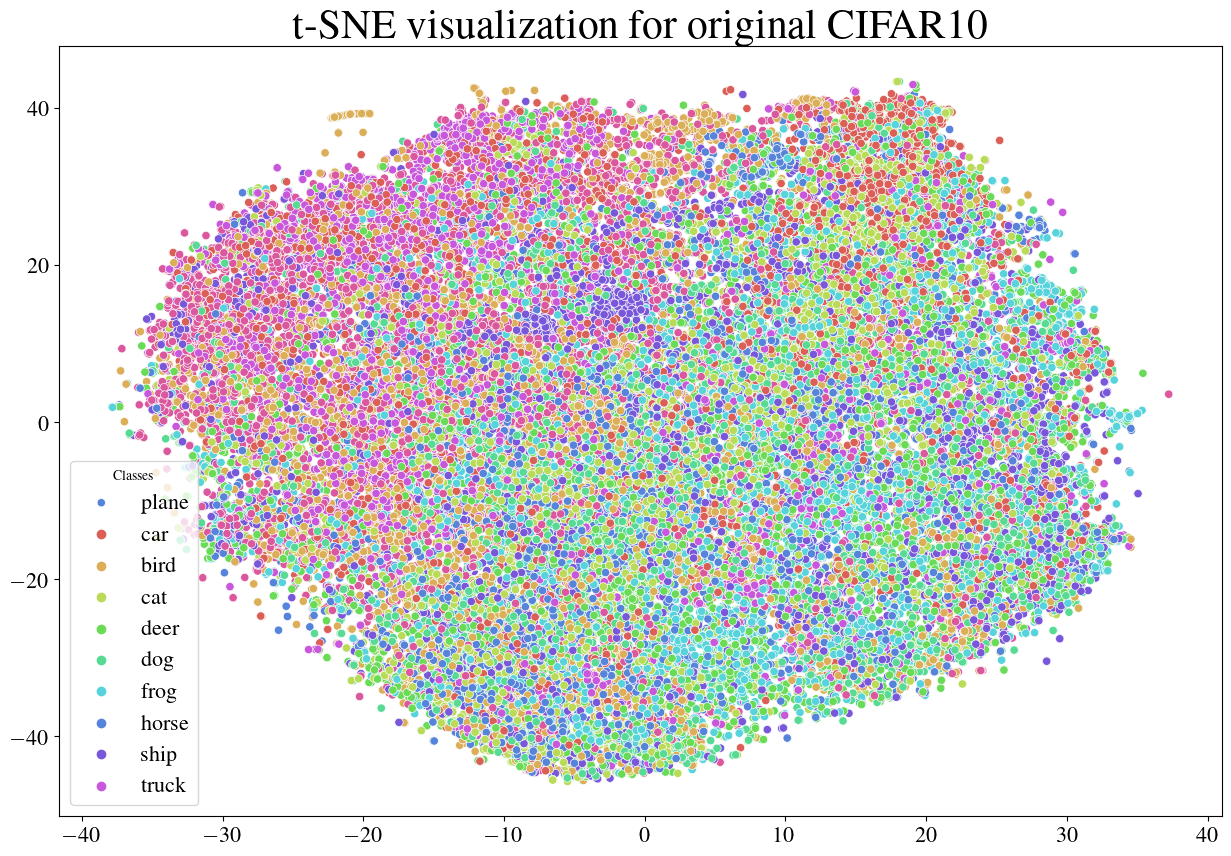

In [29]:
sns.scatterplot(x = tsne_og_data[:,0], y = tsne_og_data[:,1], hue = labels, palette = sns.hls_palette(10), legend = 'full');
plt.title("t-SNE visualization for original CIFAR10", fontsize=fontsize)
plt.xticks(fontsize=fontsize-14)
plt.yticks(fontsize=fontsize-14)
plt.legend(title='Classes', loc='best', labels=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], fontsize= fontsize-14)
# plt.savefig("../figs/tsne_CIFAR10_original.png")
plt.show()

Do the $x$ and $y$ coordinates of each point matter? or just the distance relative to other clusters?